# Introduction to Machine Learning - PROJECT

Authors: Aino Liukkonen and Raúl Cruz-Oliver

In [121]:
%reset -f

import pandas as pd
# Documentation
# https://pandas.pydata.org/docs

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

## TEST EXAMPLE

In [122]:
# Our respective DATA folder paths
data_folder = r'C:\Users\lenovo\Desktop\S7-DE\Introduction to Machine Learning\machine_learning_project\DATA'
#data_folder = r'C:\Users\ainol\OneDrive\Tiedostot\TutaJaOhtu\Machine_Learning\course_project\DATA'

# Import Data
test = pd.read_excel(data_folder + r'\test.xlsx') #once we define the folder, the path is the same



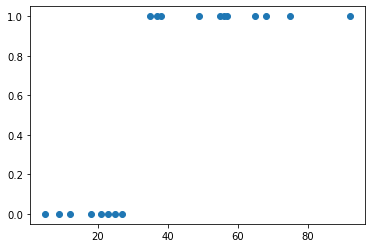

In [123]:
# Data visualization

# from data to vector
#x = test["Age"].to_numpy()
#y = test["Children"].to_numpy()


x = test["Age"].array
y = test["Children"].array



plt.scatter(x, y)

In [124]:
k = 1   #number of predictors, remember theta_0 is for the bias since x_o is always 1

sh=np.shape(x)
m=sh[0] #number of observations in the training data

#x=np.reshape(x, (m,1)) #predictors
x = x.reshape(-1, 1) 

#y=np.reshape(y, (m,1)) #labels
y = y.reshape(-1, 1) 

ones = np.ones ((m,1)) #for the bias x_0

X = np.concatenate((ones,x),axis=1) #matrix of training data

theta = np.random.rand(k+1,1)

#print(theta)
#print(X)

In [125]:
# logistic training

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_train(theta,X,y):   
    epsilon=1.0E-03
    alpha=0.1
    diff=epsilon+1
    theta_old=theta
    c=0;
    while diff > epsilon:
        theta_old=theta
        error=sigmoid(np.dot(X,theta))-y
        theta = theta_old - (alpha/m)*np.dot(np.transpose(X),error)
        diff = np.linalg.norm(theta_old-theta)
        c=c+1;
        if c == 10000:
            return theta
    return theta

theta=logistic_train(theta,X,y)    


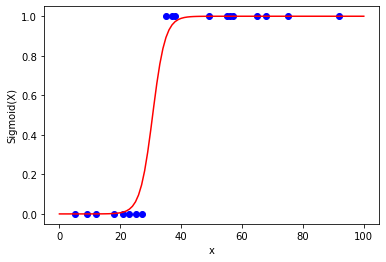

In [126]:
#trained model visualization
x_graph = np.linspace(0, 100, 101)
x_graph=np.reshape(x_graph, (101,1)) #predictors
ones = np.ones ((101,1)) #for the bias x_0
X_graph = np.concatenate((ones,x_graph),axis=1) #matrix of training data

z_graph = sigmoid(np.dot(X_graph,theta))

plt.plot(x_graph, z_graph, c="red")
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
x = test["Age"].to_numpy()
y = test["Children"].to_numpy()
plt.scatter(x, y, c="blue")

In [127]:
#PREDICTION

threshold = 0.5 #limit where sth is clasify as 1 and not anymore as 0

y_predict = sigmoid(np.dot(X,theta))

y_p = np.zeros(m)

for i in range(1,m):
    if y_predict[i]>threshold:
        y_p[i]=1
        
print(y)
print(y_p)
        
#y labelling
#y_predict return from the sigmoid
#y_p prediction based on a fixed threshold


[0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0]
[0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.]


In [128]:
#EVALUATING THE MODEL

#F-MEASURE
print("F-measure:" , metrics.f1_score(y,y_p))
#the closer to 1, the better the performance is

#K-STATISTIC
print("Kappa:",metrics.cohen_kappa_score(y, y_p))
#the closer to 1, the better the performance is

#AREA UNDER CURVE (AUC), FROM RECEIVING OPERATION CHARACTERISTIC (ROC)
print("AUC:",metrics.roc_auc_score(y,y_p))
# if AUC>0.5 it means the classificator is better than a random process. Perfect classificator <=> AUC=1

#other metrics
print(metrics.classification_report(y,y_p))

F-measure: 1.0
Kappa: 1.0
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



## ACTUAL DATA IMPORT AND PREPROCESS

In [129]:
scaler = StandardScaler()

# Read data from LOSS.mat
mat_loss = loadmat(data_folder + r'\LOSS.mat')
loss_matrix = mat_loss['LOSS']
loss_matrix = np.matrix(loss_matrix)
#select only the first  rows
loss_matrix = loss_matrix[0:900,:] #trying to take balance data somehow
#standarize the data
loss_standarized = scaler.fit_transform(loss_matrix) 
# Convert into a Pandas Data Frame
loss = pd.DataFrame(loss_standarized, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])

# Read data from PAY.mat
mat_pay = loadmat(data_folder + r'\PAY.mat')
pay_matrix = mat_pay['PAY']
pay_matrix = np.matrix(pay_matrix)
#select only the first rows
pay_matrix = pay_matrix[0:900,:] #trying to take balance data somehow
#standarize the data
pay_standarized = scaler.fit_transform(pay_matrix) 
# Convert into a Pandas Data Frame
pay = pd.DataFrame(pay_standarized, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])


# Adding a column to the DataFrames; the value of the column represents whether the mortgage has been payed back or defaulted
loss['is_paid'] = 0
pay['is_paid'] = 1

# Concatenate pay and loss data into one DataFrame
data_frames = [pay, loss]
pay_loss = pd.concat(data_frames) # it is not shuffled BE CAREFUL

# Adding a column to the DataFrames for the independent bias x_o in the literature
pay_loss['BIAS']=1

print(pay_loss.shape)

#the data has been standarized before labelling and adding BIAS because:
    #labelling is desidered to be 0 1 (tho -1,1 would be also interpretable)
    #bias term need to be perforce set to 1


(1800, 19)


In [130]:
# Split data into training and validation sets
# Training data 70 %, validation data 30 %
train_data, validation_data = model_selection.train_test_split(pay_loss, test_size=0.3) #automatically shuffle

#NOTE: the shuffle is not considering the imbalanced data, maybe:
    #1. reuse the 0 to balance the data
    #2. divide the data taking into account the imbalance. e.g. 30% total = 30%pay + 30%loss. 
    #this idea would be also interesting to implement in the k-fold

#intially implemented without taking care of this -> LET'S SEE WHAT HAPPENS
    
#within the training data, k-fold cross validation will be implemented to select the best parameters
#validation set is only used to assess the model, no to select parameters

In [131]:
#Input vector and labelling

train_x = train_data[['BIAS','NOI', 'DSCR', 'LTV', 'Balance', 
                    'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                    'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                    'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR']].to_numpy() #already proper shape
train_y = train_data['is_paid'].to_numpy()
train_y = train_y.reshape(-1, 1)    

valid_x = validation_data[['BIAS','NOI', 'DSCR', 'LTV', 'Balance', 
                    'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                    'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                    'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR']].to_numpy() #already proper shape
valid_y = validation_data['is_paid'].to_numpy()
valid_y = valid_y.reshape(-1, 1)    




## IMPLEMENTATION OF THE LOGISTIC REGRESSION WITH THE ACTUAL DATA.
All predictors initially (k=17)

In [141]:
#TRAINING WITH K-FOLD CROSS VALIDATION FOR PARAMETER SELECTION

kf = KFold(n_splits=5)

#print(kf)

#print(kf.split(X))

k=17; # DO IT AUTOMATICALLY, related with the number of predictors=number of columns apart from labelling or bias term
threshold = 0.5

for train_index, test_index in kf.split(train_x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_folded, X_test = train_x[train_index], train_x[test_index]
    y_train_folded, y_test = train_y[train_index], train_y[test_index]
    #following model training and evaluation for everyfold
    theta = np.random.rand(k+1,1)
    theta=logistic_train(theta,X_train_folded,y_train_folded)    
    y_p = sigmoid(np.dot(X_test,theta))
    #print(y_p.shape) to discover the 252
    y_predict = np.zeros(252) #252 comes from size of test data, to be automated
    for i in range(1,252): #this is just to control the threshold, no extrictly needed
        if y_p[i]>threshold:
            y_predict[i]=1
    print("AUC:",metrics.roc_auc_score(y_test,y_predict))
    

AUC: 0.5438508064516129
AUC: 0.5390866141732283
AUC: 0.49275362318840576
AUC: 0.48326715825297784
AUC: 0.47640944881889763


# CONCLUSION: 
my classificator is pretty shitty, but at least it classify things

AUC need to be at leat around 0.7 for logistic regresion, the professor got that in his paper.

now, we are around 0.5, or even worse, meaning that that a random even a random clasifier will perform better. :(

## SELECCTION OF THE MOST RELEVANT VARIABLES

This information may be relevant
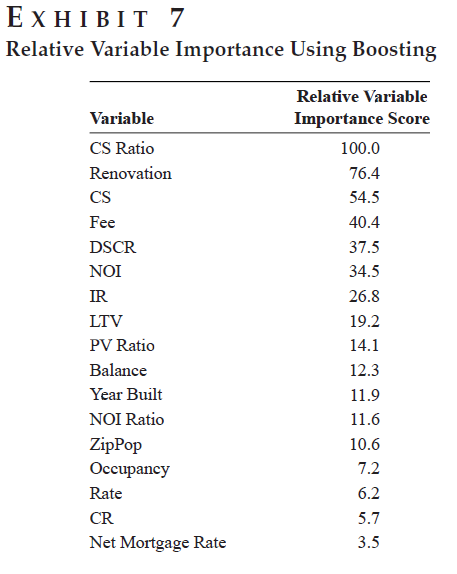 